# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?

   **My Answer** I don't agree with the above analysis. Since it is not statistically correct to just compare the mean value of two samples and conclude that there are true differences between the two samples. In this case, the excess readmission rate between small hospitals and large hospitals. 
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   
   
   **My Anwser** I decided to firstly redefine small hospital and large hospital. In this case, originally, the samples in small hospital groups are far more than that in large hospital group. This may affect the hypothesis test. So I will define a group of hospitals with small numbers of discharges, as the sample of small hospital, and a group of hospitals with large numbers of discharges, as the sample of large hospital. I will have the two samples with roughly similar numbers of samples. 
   
   2. Compute and report the observed significance value (or p-value).
   
   3. Report statistical significance for $\alpha$ = .01. 
   
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Step 1

**Read the datasets as Pandas Dataframe, clean the data** 

In [150]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import ttest_ind

In [151]:
# reahospital_read_df['Number of Discharges']d in readmissions data provided 
hospital_read_df = pd.read_csv('/Users/nisong/Desktop/cms_hospital_readmissions.csv')

In [152]:
hospital_read_df.columns.values

array(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'], dtype=object)

In [153]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:,'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

# Step2

**Slice the columns of our interests, evaluate how many NaNs it has (under 10% comparing the total rows), and get rid of NaNs**

In [154]:
clean_hospital_read_df2 = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]

In [155]:
clean_hospital_read_df2['Excess Readmission Ratio'].isnull().sum()

81

In [156]:
clean_hospital_read_df3 = clean_hospital_read_df2.dropna(how='any')  

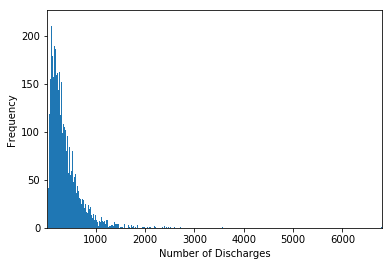

In [157]:
plt.xlim([min(clean_hospital_read_df3['Number of Discharges'])-10, max(clean_hospital_read_df3['Number of Discharges'])+10])

plt.hist(clean_hospital_read_df3['Number of Discharges'],bins = 1000)

plt.xlabel('Number of Discharges')
plt.ylabel('Frequency')
plt.show()
                                                                               

# Step 3

** Identify one sample of large hospitals, and another sample of small hospitals**
** Assess whether the two samples are normally distributed**

*Large Hospitals*

In [158]:
sample_greater_than_700 = clean_hospital_read_df3[clean_hospital_read_df2['Number of Discharges'] > 700]

/Users/nisong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [159]:
large_hospital_ratio= sample_greater_than_700.loc[:, 'Excess Readmission Ratio'].values



In [160]:
b = sample_greater_than_700.loc[:,'Excess Readmission Ratio']. values




In [161]:
a = sample_greater_than_700.loc[:,'Number of Discharges']. values




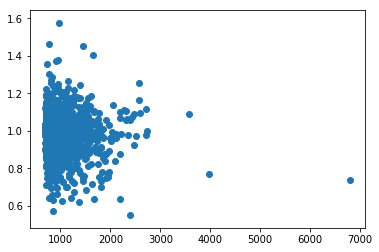

In [162]:
plt.scatter(a,b)

plt.show()



In [163]:
large_hospital_ratio

array([ 1.0011,  0.9775,  1.011 , ...,  1.0896,  0.7682,  0.7379])

*Evaluate wether the Excess Readmission Ratio of large hospitals is a normal distribution*

In [164]:
scipy.stats.mstats.normaltest(large_hospital_ratio)


NormaltestResult(statistic=55.352035523863897, pvalue=9.5600068825077925e-13)

In [ ]:
# check the documentation

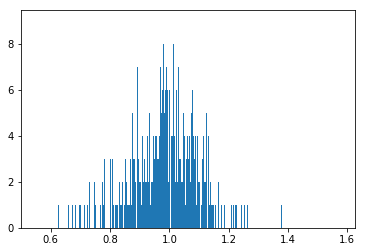

In [165]:
plt.hist(large_hospital_ratio, bins=1188)
plt.show()



*Small Hospitals*

In [166]:
sample_lower_than_100 = clean_hospital_read_df3[clean_hospital_read_df2['Number of Discharges'] < 100]

/Users/nisong/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [167]:
small_hospital_ratio = sample_lower_than_100.loc[:,'Excess Readmission Ratio']. values

In [168]:
b = sample_lower_than_100.loc[:,'Excess Readmission Ratio']. values

In [169]:
a = sample_lower_than_100.loc[:,'Number of Discharges']. values

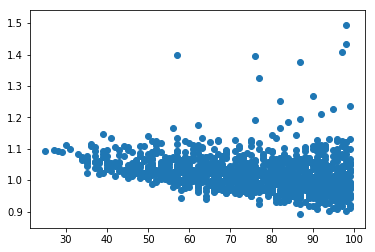

In [170]:
plt.scatter(a,b)
plt.show()

In [171]:
small_hospital_ratio

array([ 1.0914,  1.0961,  1.0934, ...,  1.0248,  0.9878,  1.0337])

In [172]:
scipy.stats.mstats.normaltest(small_hospital_ratio)


NormaltestResult(statistic=608.33925182077655, pvalue=7.9581093899479642e-133)

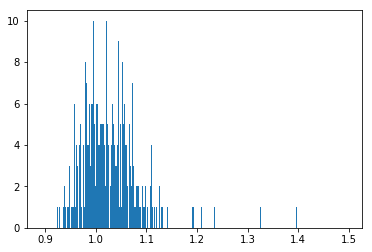

In [173]:
plt.hist(small_hospital_ratio, bins=1188)
plt.show()


In [174]:
len_small_hospital_ratio = len(small_hospital_ratio)



In [175]:
len_small_hospital_ratio



1188

In [176]:
len_large_hospital_ratio = len(large_hospital_ratio)



In [177]:
len_large_hospital_ratio 



1246

# Step 4 

**Set up Hypothesis test**

In [178]:
t, p = ttest_ind(small_hospital_ratio, large_hospital_ratio, equal_var=False)


In [179]:
t



9.1829256478566741

In [180]:
p


1.0747917746679821e-19

# Step 5

**Generate plot of the dataset**

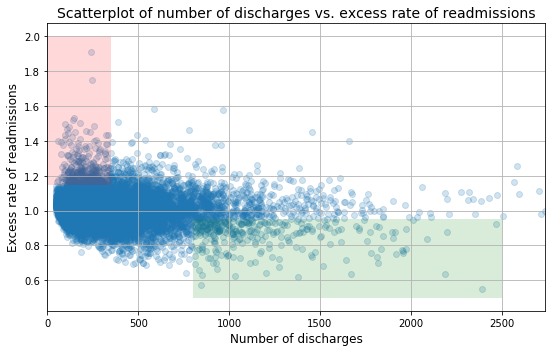

In [181]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df3['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df3['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

# 关于这个语法 Axes.fill_between(x, y1, y2=0, where=None, interpolate=True, step=None, *, data=None, **kwargs)¶
ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = 0.15, interpolate=False)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=False)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()